In [89]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import h5py

import sys

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from PIL import Image


In [83]:
# Chemin vers le répertoire contenant les sous-dossiers
directory = "/Users/christophemura/Documents/Git/Datasets/training_images"

# Dictionnaire pour mapper les noms de dossiers aux classes
class_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5
}

In [84]:
# Nom du fichier où vous voulez enregistrer les données
output_h5_file = "donnees.h5"

# Liste pour stocker les données
data = []

In [85]:
# Parcourir les dossiers dans le répertoire
for folder_name in os.listdir(directory):
    folder_path = os.path.join(directory, folder_name)
    # Vérifier s'il s'agit bien d'un dossier
    if os.path.isdir(folder_path):
        # Obtenir la classe correspondante au dossier
        label = class_mapping.get(folder_name, -1)
        # Vérifier si la classe existe dans le mapping
        if label != -1:
            # Parcourir les fichiers dans le dossier
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                # Vérifier s'il s'agit bien d'un fichier image
                if os.path.isfile(file_path) and filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                    # Charger l'image avec PIL
                    image = Image.open(file_path)
                    # Convertir l'image en tableau NumPy si nécessaire
                    image_array = np.array(image)
                    # Fermer l'image
                    image.close()
                    # Ajouter le chemin de l'image et l'étiquette à la liste des données
                    data.append((file_path, label))

# Convertir la liste de tuples en tableau NumPy pour faciliter la manipulation
data = np.array(data, dtype=[('image_path', 'S100'), ('label', int)])


In [86]:
with h5py.File(output_h5_file, 'w') as hf:
    # Créer des ensembles de données dans le fichier HDF5
    hf.create_dataset('image_paths', data=data['image_path'])
    hf.create_dataset('labels', data=data['label'])

print("Données enregistrées avec succès dans", output_h5_file)

Données enregistrées avec succès dans donnees.h5


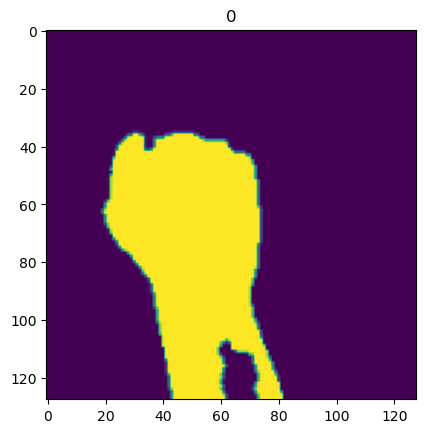

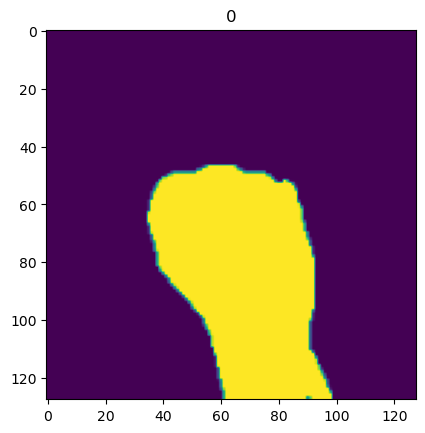

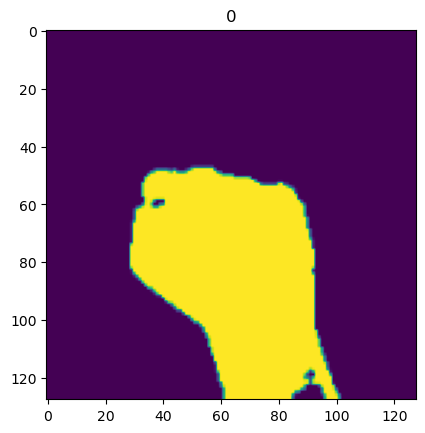

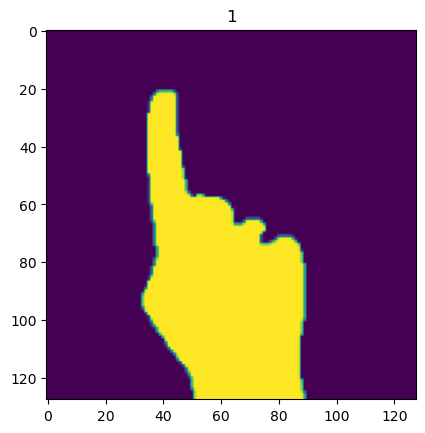

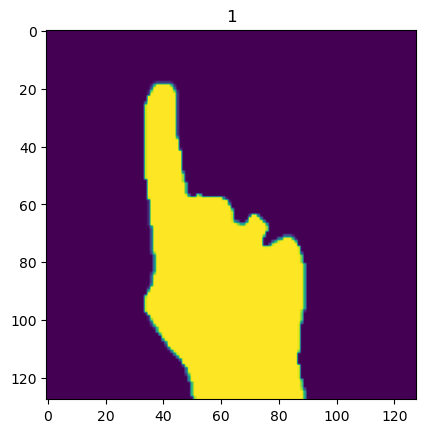

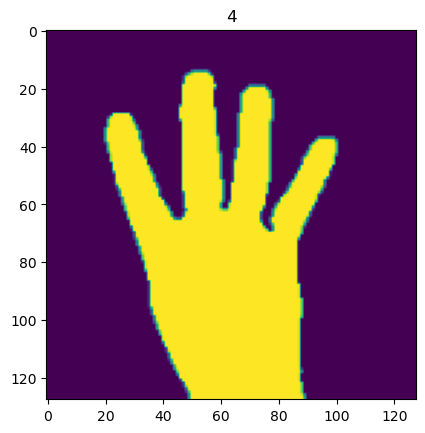

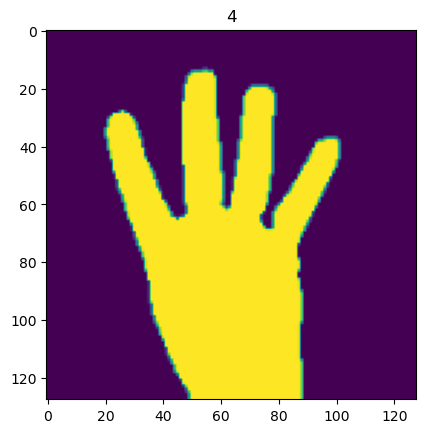

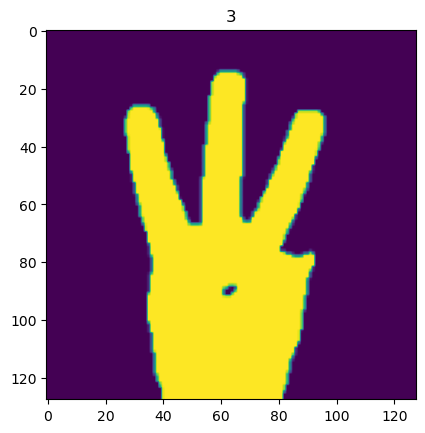

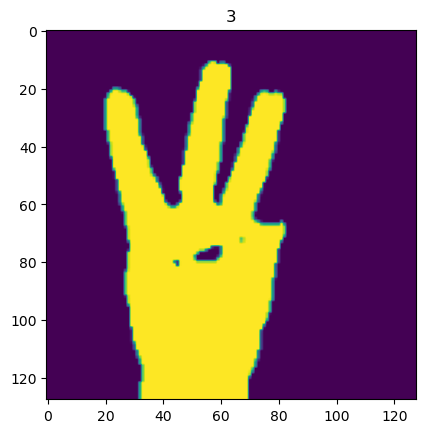

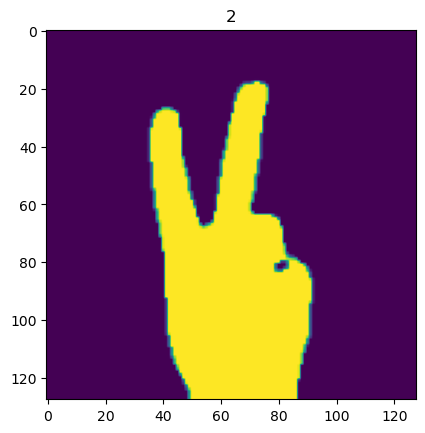

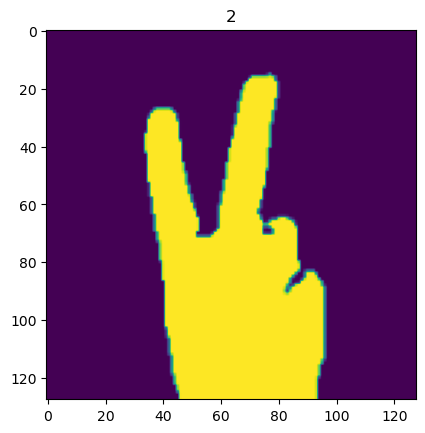

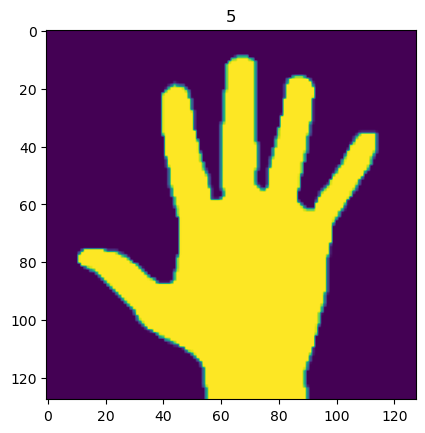

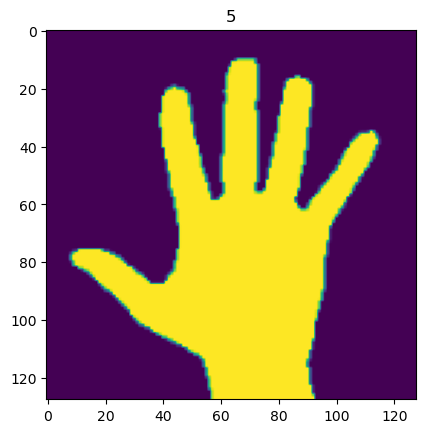

In [88]:
import matplotlib.pyplot as plt
# Charger le fichier HDF5
datas = h5py.File('donnees.h5', 'r')
#with h5py.File('donnees.h5', 'r') as hf:
# Accéder aux ensembles de données
image_paths = datas['image_paths'][:]
labels = datas['labels'][:]


# Afficher les 10 premières images
for i in range(0, 12006, 1000):
    # Charger l'image depuis le chemin d'accès
    image_path = image_paths[i].decode('utf-8')  # Convertir le chemin d'accès en chaîne de caractères
    image = plt.imread(image_path)

    # Afficher l'image avec le label correspondant
    plt.imshow(image)
    plt.title(f"{labels[i]}")
    plt.show()